In [1]:
# Import des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.drop(["CustomerID"], axis=1, inplace=True)

In [6]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
data.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<AxesSubplot:>

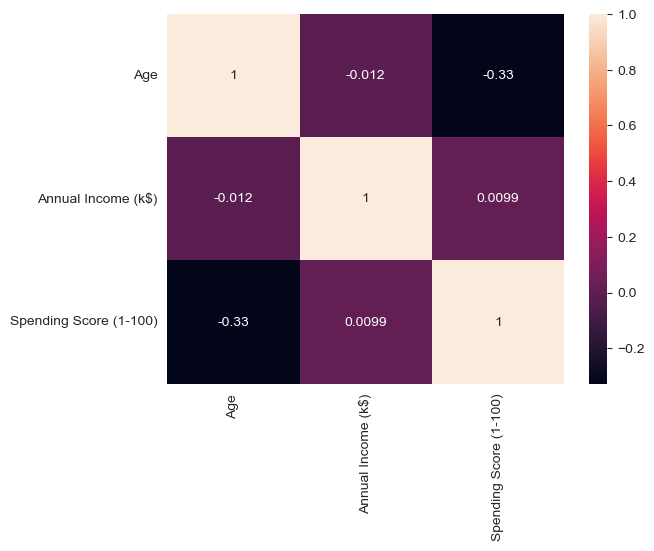

In [8]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Genre', ylabel='count'>

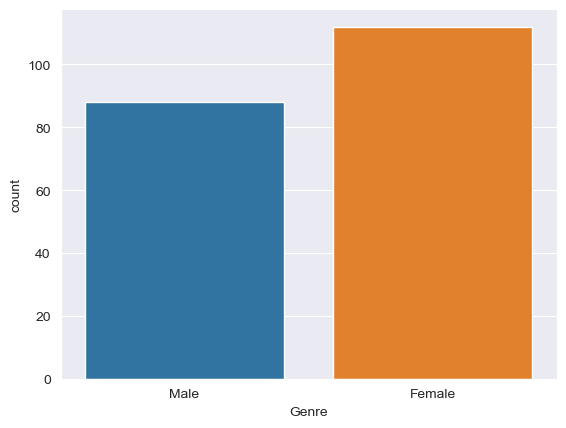

In [9]:
sns.countplot(x=data.Genre, data=data)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

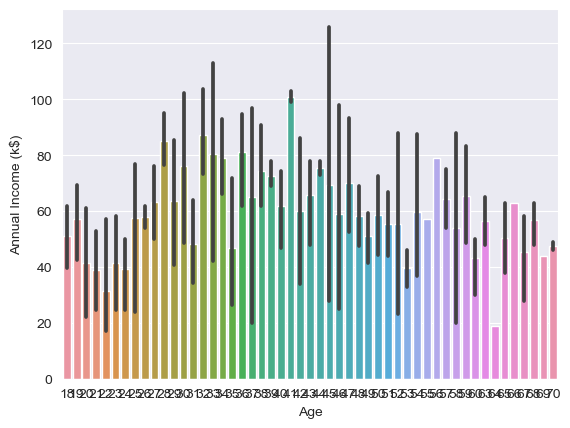

In [10]:
sns.barplot(x=data.Age, y=data["Annual Income (k$)"])

<AxesSubplot:xlabel='Genre', ylabel='Age'>

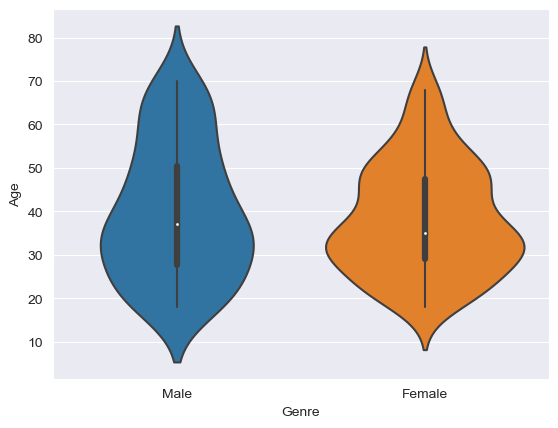

In [11]:
sns.violinplot(x=data.Genre, y=data.Age)

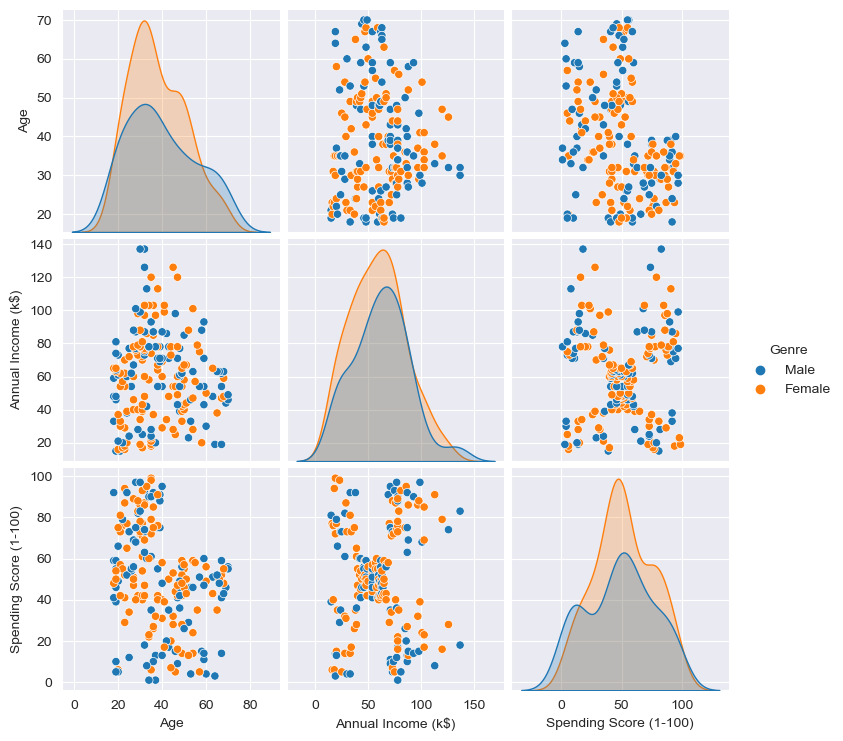

In [14]:
sns.pairplot(data, hue="Genre")

In [15]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [17]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]].values

C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


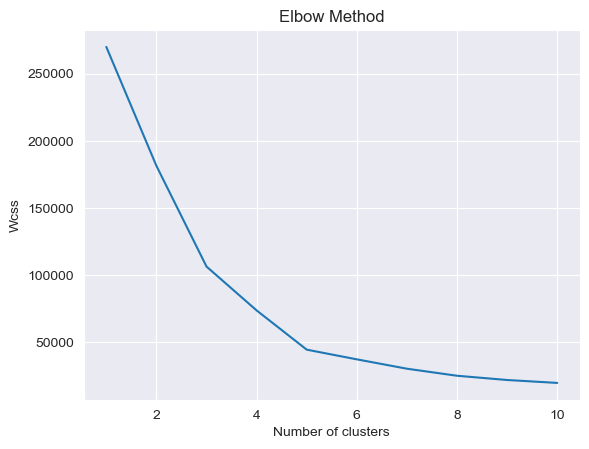

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()

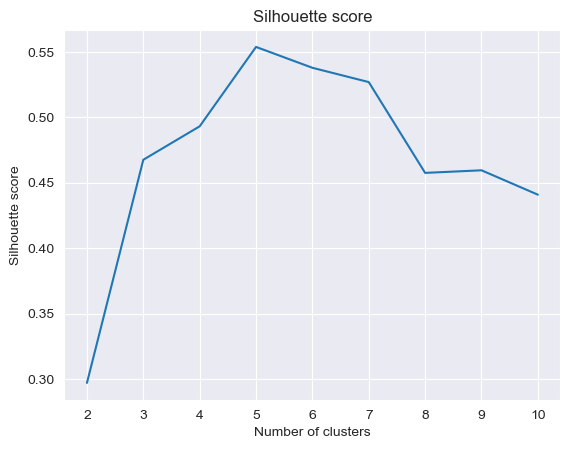

In [20]:
from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure()
plt.title("Silhouette score")
plt.plot(range(2, kmax+1), sil)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

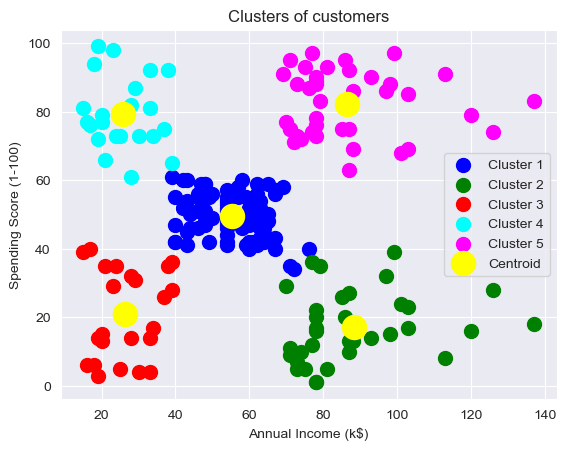

In [29]:
#visulaizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(X[y_kmeans== 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

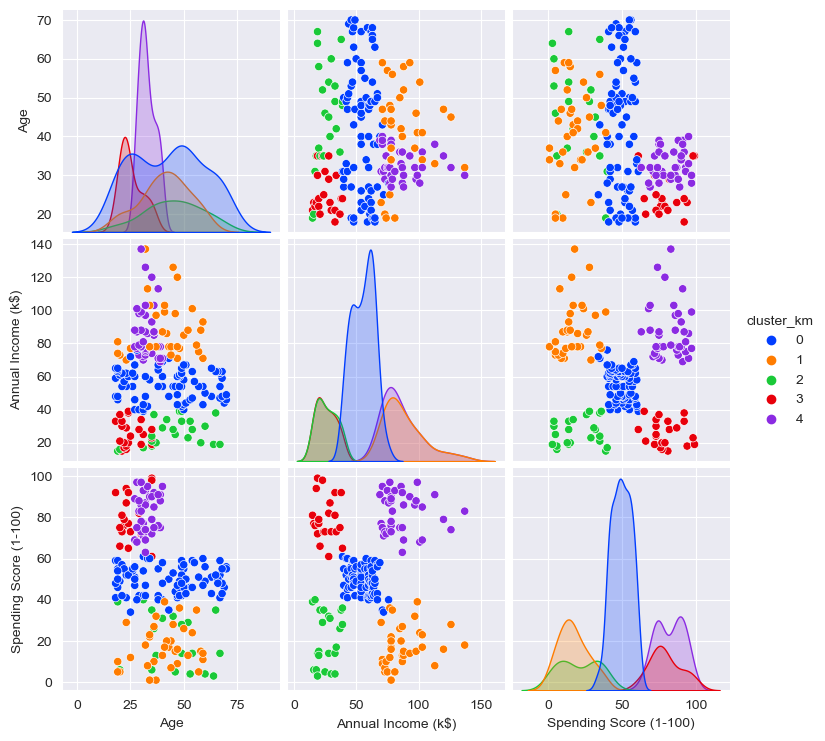

In [30]:
data['cluster_km'] = kmeans.labels_
sns.pairplot(data, palette="bright", hue="cluster_km")

In [31]:
display(data.groupby("cluster_km").mean())

,Age,Annual Income (k$),Spending Score (1-100)
cluster_km,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


C:\Users\ngoue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

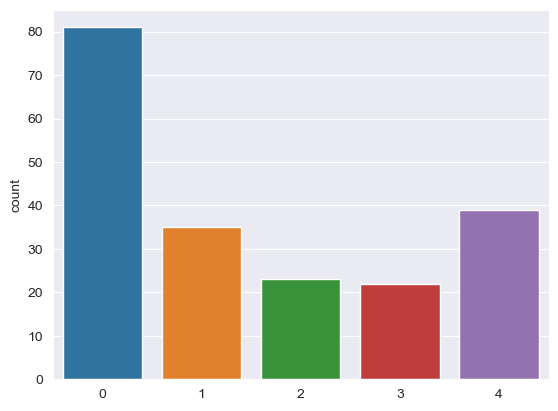

In [32]:
sns.countplot(y_kmeans)

In [33]:
cluster_1 = data[data['cluster_km'] == 1]
len(cluster_1)

35

C:\Users\ngoue\AppData\Local\Temp\ipykernel_13996\2841604313.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


TypeError: 'XAxis' object is not callable

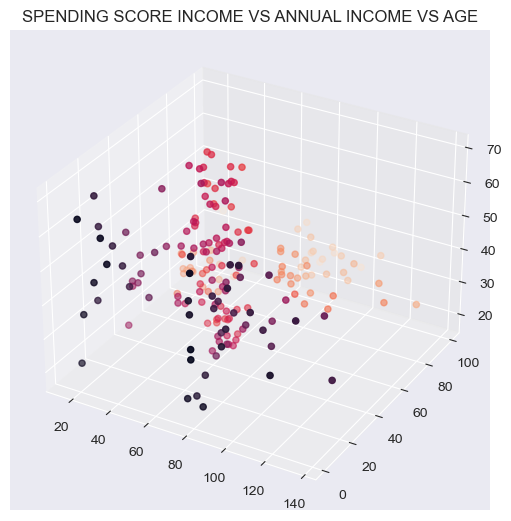

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
x = np.array(data['Annual Income (k$)'])
y = np.array(data['Spending Score (1-100)'])
z = np.array(data['Age'])
ax.scatter(x,y,z,c=y)
plt.title("SPENDING SCORE INCOME VS ANNUAL INCOME VS AGE")
ax.xaxis("df")
ax.yaxis("ddf")
ax.zaxis("dffef")